## Exercicio de Arvore de Decisao e Floresta Aleatória

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

### Leitura dos dados

In [3]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv'
df = pd.read_csv(caminho)

### Análise exploratória

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


coluna target: NOT.FULLY.PAID

In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Análise visual

Text(0.5, 1.0, 'Histograma de FICO por credito policy')

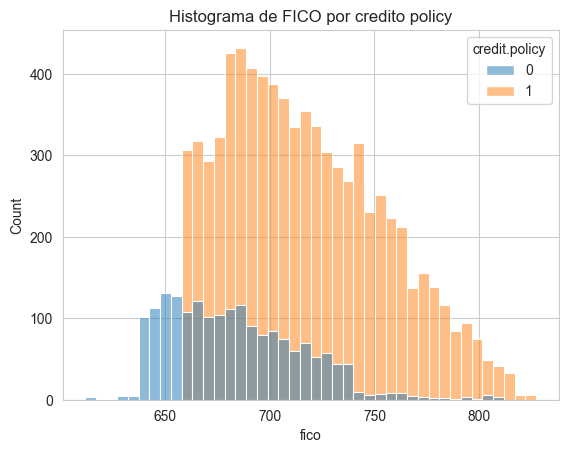

In [7]:
sns.histplot(df, x='fico', hue='credit.policy')
plt.title('Histograma de FICO por credito policy')

<Axes: xlabel='fico', ylabel='Count'>

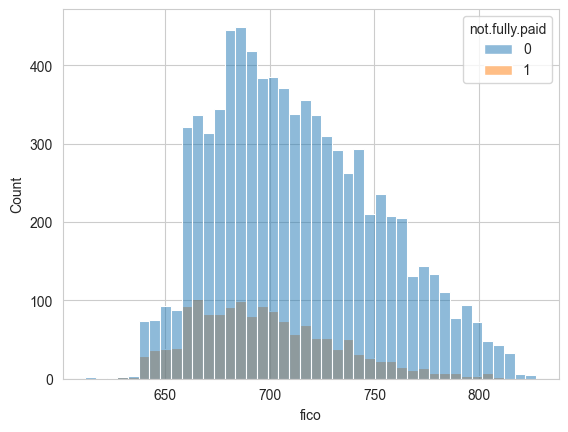

In [8]:
sns.histplot(df, x='fico', hue='not.fully.paid')

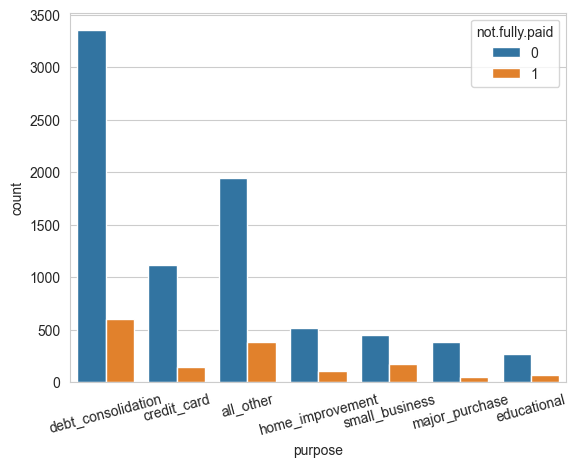

In [9]:
p = sns.countplot(df, x='purpose', hue='not.fully.paid', )
plt.xticks(rotation=15)
plt.show()

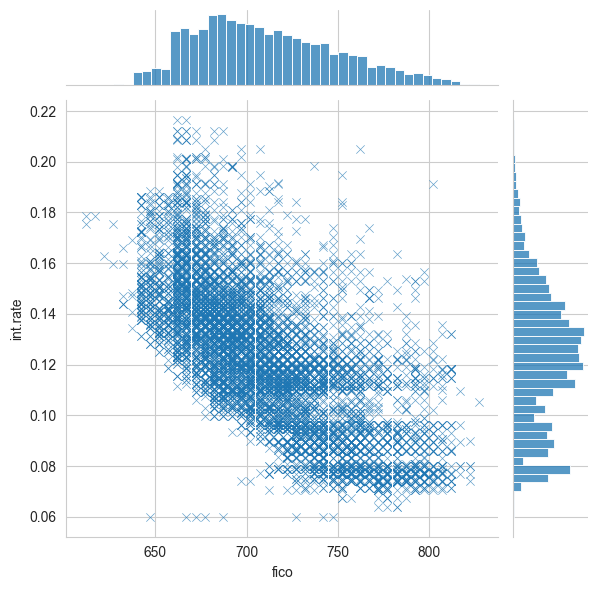

In [10]:
sns.jointplot(df, x='fico', y='int.rate', alpha=0.7, marker='x')

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


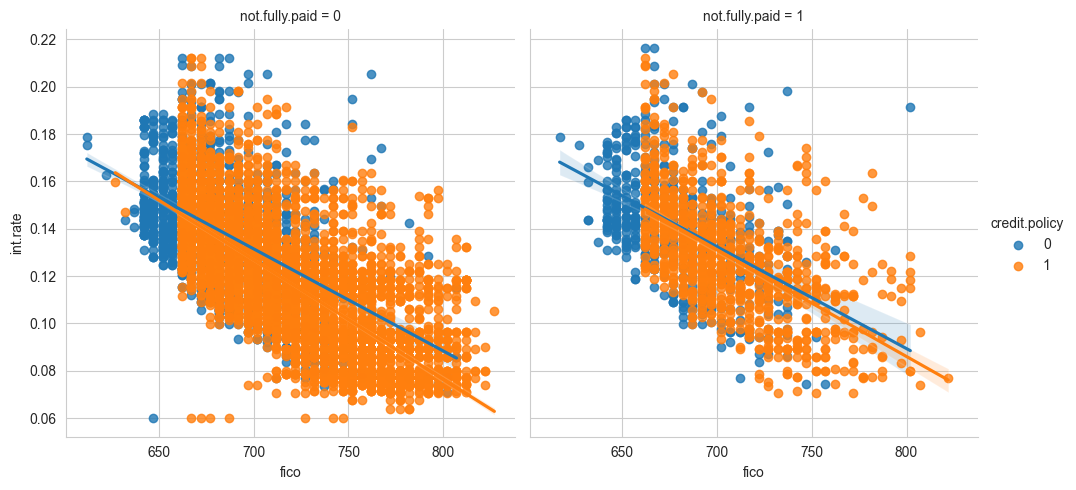

In [11]:
sns.lmplot(df, x='fico', y='int.rate',
           hue='credit.policy', col='not.fully.paid',
           )

### Modelagem

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [13]:
cat_feats = ['purpose']

#### Dummies

In [14]:
final_data = pd.get_dummies(df, columns=cat_feats, drop_first=True)

#### Separação de dados de treino

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
col_alvo = 'not.fully.paid'
cols = list(final_data.columns)
cols_feat = list(filter(lambda x: x != col_alvo, cols))


In [17]:
X = final_data[cols_feat]
y = final_data[col_alvo]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Modelo - Arvore de Decisão

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()

In [21]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Predicao e Avaliação do modelo

In [22]:
pred = dtree.predict(X_test)

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2220  430]
 [ 394  117]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2650
           1       0.21      0.23      0.22       511

    accuracy                           0.74      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.74      0.74      3161



#### Floresta Aleatória

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [27]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

#### Predição e avaliação

In [28]:
pred = rfc.predict(X_test)

In [29]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2636   14]
 [ 503    8]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.36      0.02      0.03       511

    accuracy                           0.84      3161
   macro avg       0.60      0.51      0.47      3161
weighted avg       0.76      0.84      0.77      3161



#### Teste com ENTROPIA

In [30]:
criterio = 'entropy'

In [31]:
dtree = DecisionTreeClassifier(criterion=criterio)

In [32]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

#### Predicao e Avaliação do modelo

In [33]:
pred = dtree.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[2233  417]
 [ 389  122]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2650
           1       0.23      0.24      0.23       511

    accuracy                           0.75      3161
   macro avg       0.54      0.54      0.54      3161
weighted avg       0.75      0.75      0.75      3161



#### Floresta Aleatória

In [35]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=-1, criterion=criterio)

In [36]:
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=-1)

#### Predição e avaliação

In [37]:
pred = rfc.predict(X_test)

In [38]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2642    8]
 [ 506    5]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2650
           1       0.38      0.01      0.02       511

    accuracy                           0.84      3161
   macro avg       0.61      0.50      0.47      3161
weighted avg       0.77      0.84      0.77      3161

